# Pregunta 1.2

### Denoising

In [3]:
from keras.datasets import mnist
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras.utils import np_utils
from keras.optimizers import SGD
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.random import binomial
from numpy.random import standard_normal
from keras.models import load_model
from keras.models import model_from_json

Using TensorFlow backend.


In [4]:
def f(nval=1000):
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.
    x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
    x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
    x_val = x_train[-nval:]
    y_val = y_train[-nval:]
    x_train = x_train[:-nval]
    y_train = y_train[:-nval]
    Y_train = np_utils.to_categorical(y_train, 10)
    Y_val = np_utils.to_categorical(y_val, 10)
    Y_test = np_utils.to_categorical(y_test, 10)
    return (x_train, Y_train, y_train), (x_test, Y_test, y_test), (x_val, Y_val, y_val)

In [5]:
# Obtener conjuntos de datos
train, test, val = f()
x_train, Y_train, y_train = train
x_test, Y_test, y_test = test
x_val, Y_val, y_val = val

## a)

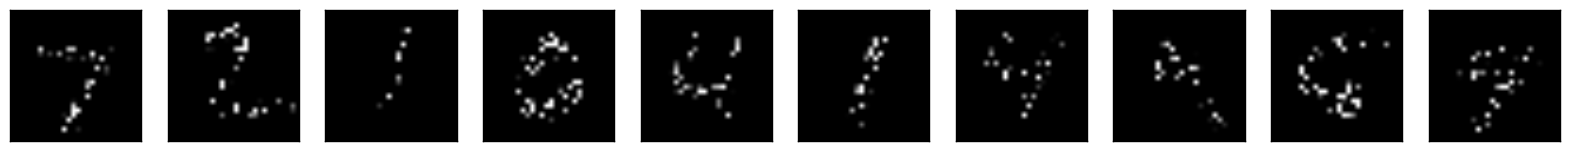

In [4]:
noise_level = 0.2
noise_mask = binomial(n=1,p=noise_level,size=x_train.shape)
noisy_x_train = x_train*noise_mask
noise_mask = binomial(n=1,p=noise_level,size=x_val.shape)
noisy_x_val = x_val*noise_mask
noise_mask = binomial(n=1,p=noise_level,size=x_test.shape)
noisy_x_test = x_test*noise_mask

n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(noisy_x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## b)

```python
noise_levels = [0.1,0.2,0.4,0.6,0.8,1.0]
i = 0

for noise_level in noise_levels:
    i += 1
    noise_mask = binomial(n=1,p=noise_level,size=x_train.shape)
    noisy_x_train = x_train*noise_mask
    noise_mask = binomial(n=1,p=noise_level,size=x_val.shape)
    noisy_x_val = x_val*noise_mask
    noise_mask = binomial(n=1,p=noise_level,size=x_test.shape)
    noisy_x_test = x_test*noise_mask

    input_img = Input(shape=(784,))
    encoded = Dense(32, activation='sigmoid')(input_img)
    decoded = Dense(784, activation='sigmoid')(encoded)
    autoencoder = Model(input=input_img, output=decoded)
    encoder = Model(input=input_img, output=encoded)
    encoded_input = Input(shape=(32,))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))
    autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
    autoencoder.fit(noisy_x_train,x_train,nb_epoch=50,batch_size=25,shuffle=True, validation_data=(noisy_x_val, x_val))
    autoencoder.save("autoencoder"+str(i)+".h5")
    encoder.save("encoder"+str(i)+".h5")
    decoder.save("decoder"+str(i)+".h5")
    # Se ejecuta en servidor con GPU
```

In [15]:
# Se carga el output obtenido para mostrarlo
text_file = open('1_2/outputb', 'r')

output = text_file.read()

#print output

|Noise Level|val_loss|
|:------------:|:------------:|
|0.1|0.1898|
|0.2|0.1648|
|0.4|0.1376|
|0.6|0.1208|
|0.8|0.1077|
|1.0|0.0942|


Nivel de Ruido:  0.1
Imagenes Corruptas:


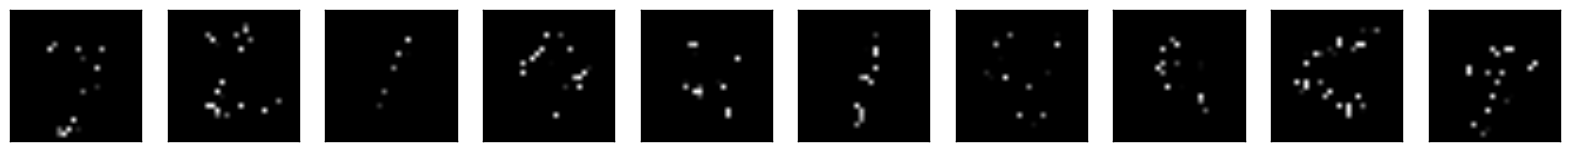

Imagenes Reconstruidas:


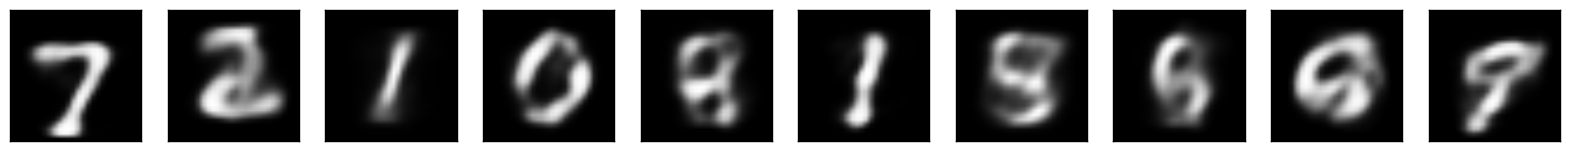

Nivel de Ruido:  0.2
Imagenes Corruptas:


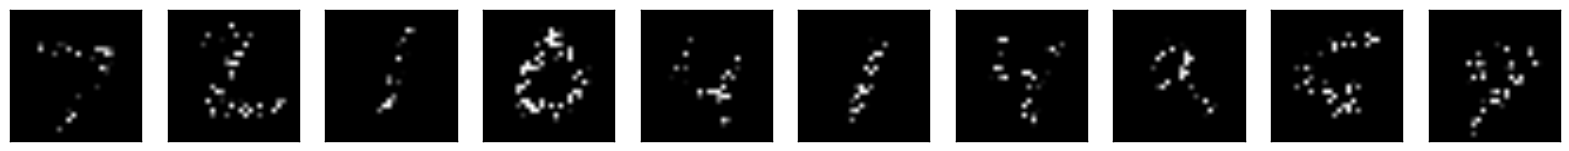

Imagenes Reconstruidas:


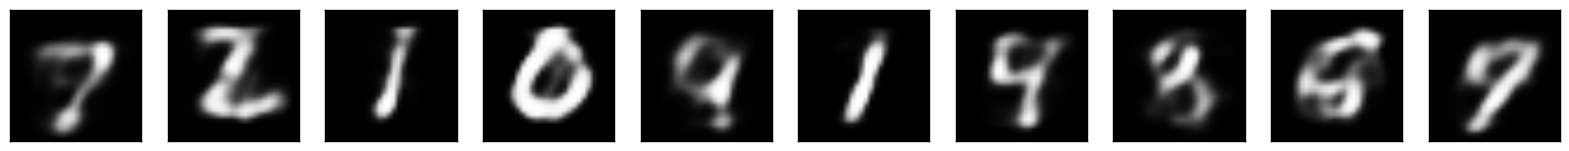

Nivel de Ruido:  0.4
Imagenes Corruptas:


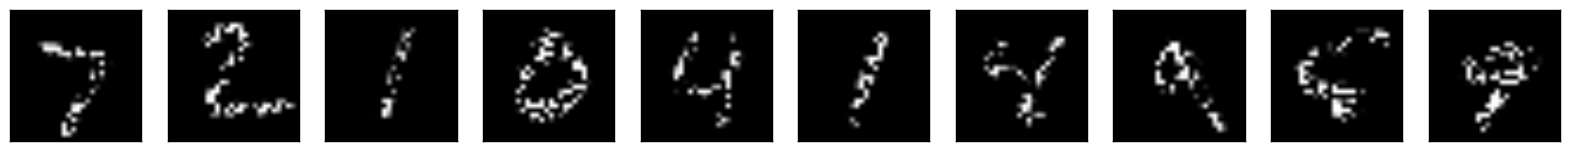

Imagenes Reconstruidas:


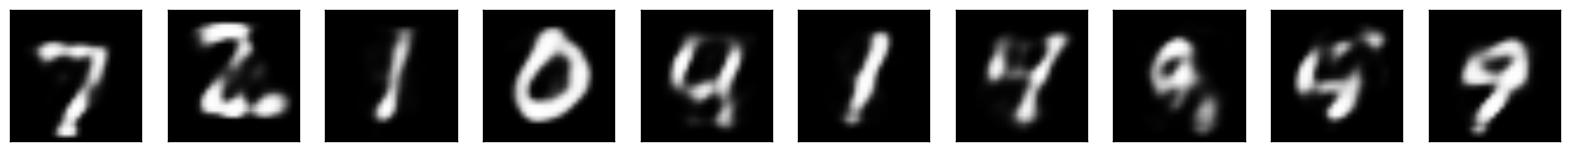

Nivel de Ruido:  0.6
Imagenes Corruptas:


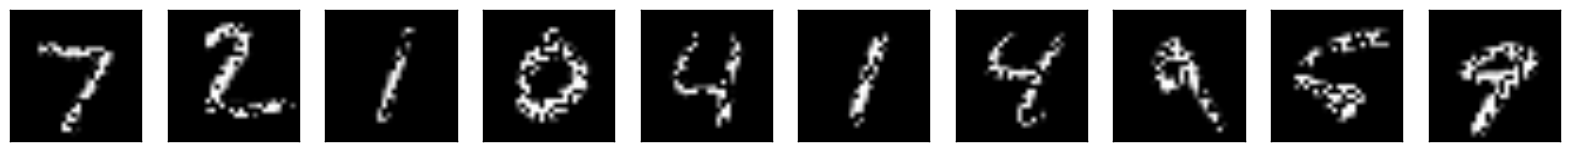

Imagenes Reconstruidas:


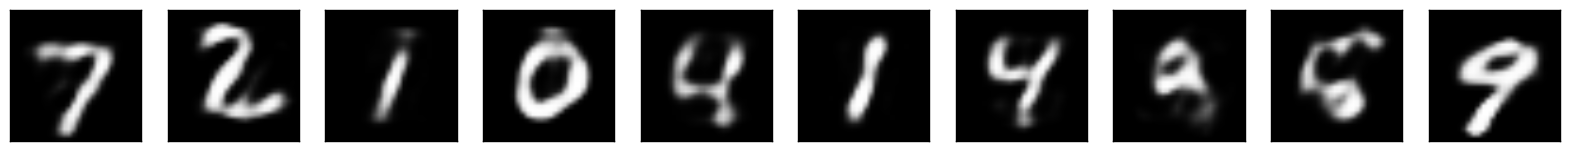

Nivel de Ruido:  0.8
Imagenes Corruptas:


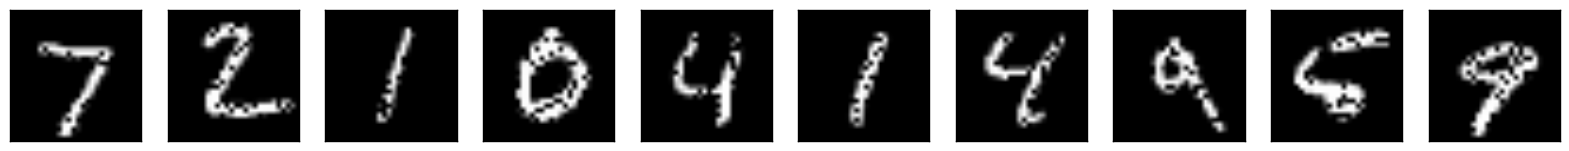

Imagenes Reconstruidas:


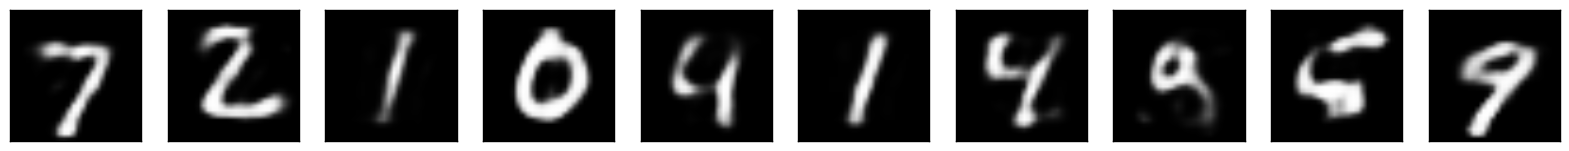

Nivel de Ruido:  1.0
Imagenes Corruptas:


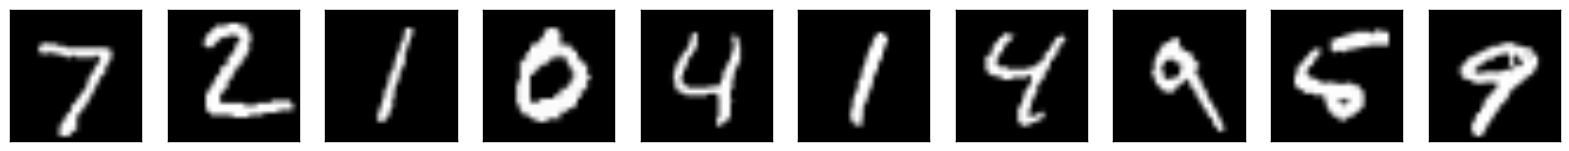

Imagenes Reconstruidas:


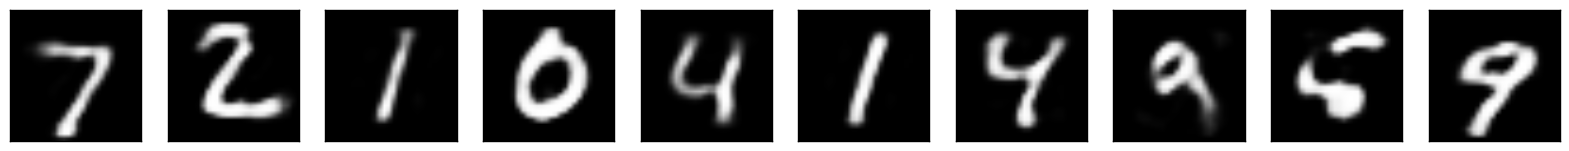

In [13]:
noise_levels = [0.1,0.2,0.4,0.6,0.8,1.0]

for i in range(len(noise_levels)):
    noise_level = noise_levels[i]

    # Se carga el encoder y decoder obtenido para noise_level 0,1
    encoder = load_model('1_2/encoder'+str(i+1)+'.h5')
    decoder = load_model('1_2/decoder'+str(i+1)+'.h5')

    print "Nivel de Ruido: ", noise_level

    # Se corrompe la imagen a mostrar

    noise_mask = binomial(n=1,p=noise_level,size=x_test.shape)
    noisy_x_test = x_test*noise_mask

    # Visualización postdenoising
    n = 10

    # Se muestra la imagen corrupta
    print "Imagenes Corruptas:"
    plt.figure(figsize=(20, 2))
    for i in range(n):
        ax = plt.subplot(1, n, i+1)
        plt.imshow(noisy_x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

    # Se muestra la imagen reconstruida
    print "Imagenes Reconstruidas:"
    plt.figure(figsize=(20, 2))
    for i in range(n):
        ax = plt.subplot(1, n, i+1)
        encoded = encoder.predict(noisy_x_test[i].reshape(1,784))
        decoded = decoder.predict(encoded)
        plt.imshow(decoded.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

## c)

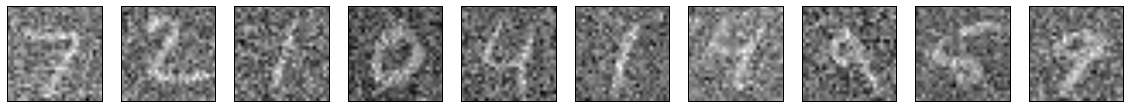

In [10]:
devst = 0.5
noise_mask = devst*standard_normal(size=x_train.shape)
noisy_x_train = x_train + noise_mask
noise_mask = devst*standard_normal(size=x_val.shape)
noisy_x_val = x_val + noise_mask
noise_mask = devst*standard_normal(size=x_test.shape)
noisy_x_test = x_test + noise_mask

n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(noisy_x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## d)

```python
devsts = [0.1,0.3,0.5,0.7,0.9,1.0]
i = 0

for devsts in devsts:
    i += 1
    noise_mask = devst*standard_normal(size=x_train.shape)
    noisy_x_train = x_train+noise_mask
    noise_mask = devst*standard_normal(size=x_val.shape)
    noisy_x_val = x_val+noise_mask
    noise_mask = devst*standard_normal(size=x_test.shape)
    noisy_x_test = x_test+noise_mask

    input_img = Input(shape=(784,))
    encoded = Dense(32, activation='relu')(input_img)
    decoded = Dense(784, activation='sigmoid')(encoded)
    autoencoder = Model(input=input_img, output=decoded)
    encoder = Model(input=input_img, output=encoded)
    encoded_input = Input(shape=(32,))
    decoder_layer = autoencoder.layers[-1]
    decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))
    autoencoder.compile(optimizer=SGD(lr=1.0), loss='binary_crossentropy')
    autoencoder.fit(noisy_x_train,x_train,nb_epoch=50,batch_size=25,shuffle=True, validation_data=(noisy_x_val, x_val))
    autoencoder.save("autoencoder_2_"+str(i)+".h5")
    encoder.save("encoder_2_"+str(i)+".h5")
    decoder.save("decoder_2_"+str(i)+".h5")
    
```

In [11]:
# Se carga el output obtenido para mostrarlo
text_file = open('1_2/outputd', 'r')

output = text_file.read()

#print output

|Standard Deviation|val_loss|
|:------------:|:------------:|
|0.1|0.0962|
|0.3|0.1077|
|0.5|0.1238|
|0.7|0.1412|
|0.9|0.1553|
|1.0|0.1623|

Desviación Estándar:  0.1
Imagenes Corruptas:


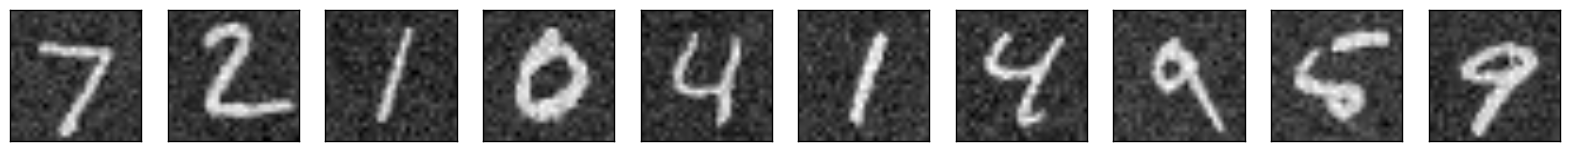

Imagenes Reconstruidas:


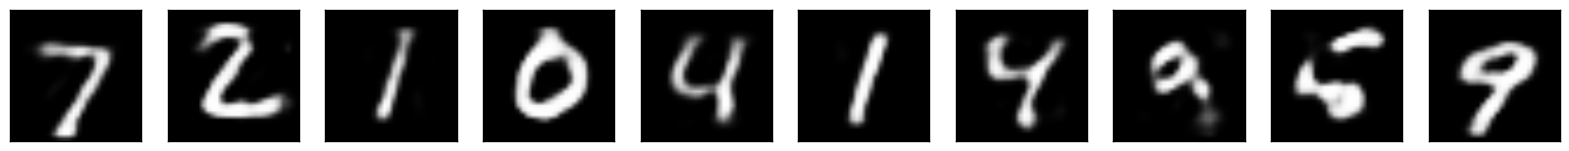

Desviación Estándar:  0.3
Imagenes Corruptas:


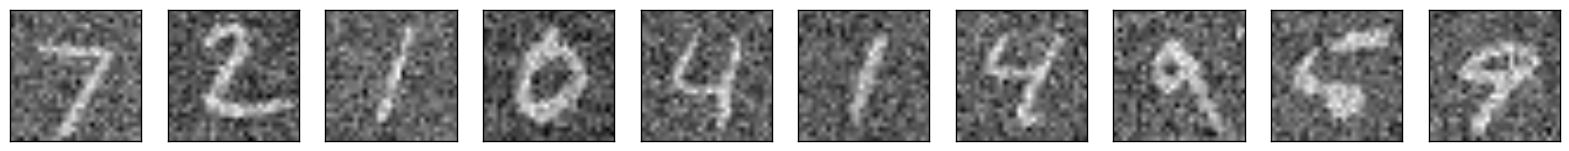

Imagenes Reconstruidas:


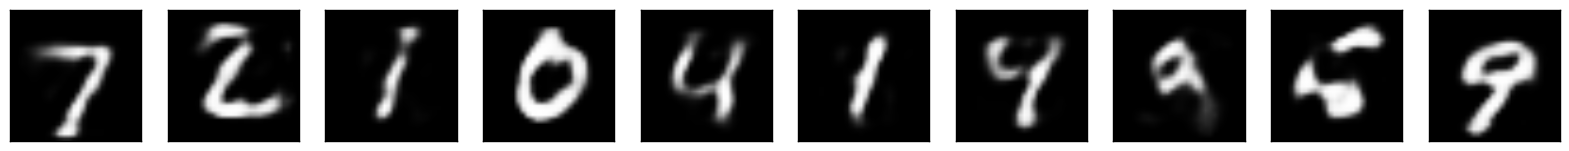

Desviación Estándar:  0.5
Imagenes Corruptas:


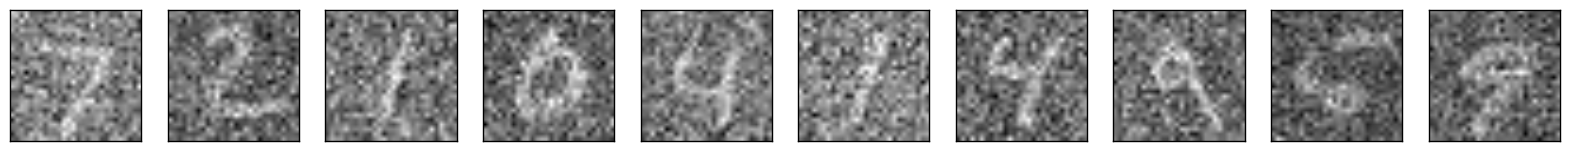

Imagenes Reconstruidas:


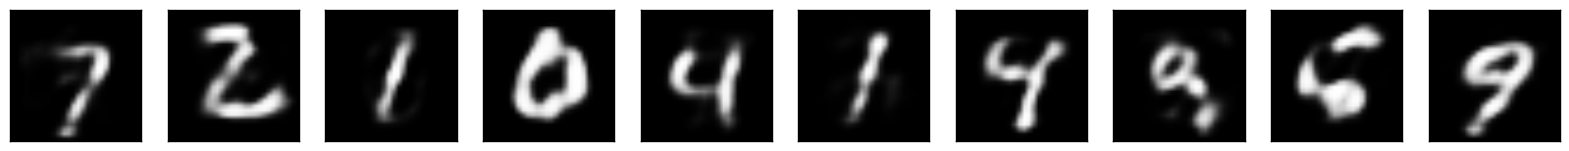

Desviación Estándar:  0.7
Imagenes Corruptas:


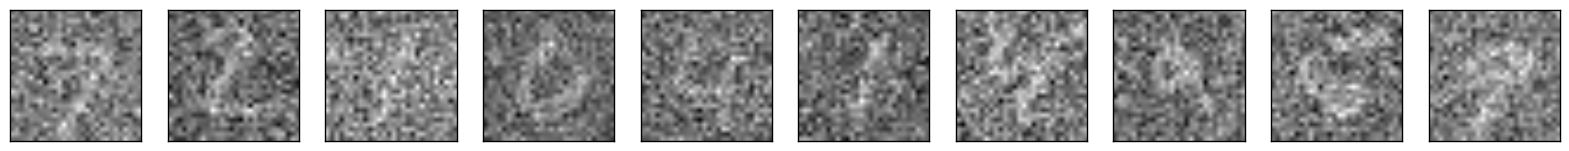

Imagenes Reconstruidas:


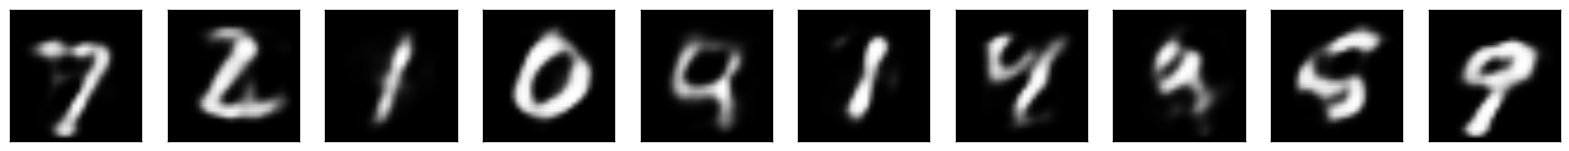

Desviación Estándar:  0.9
Imagenes Corruptas:


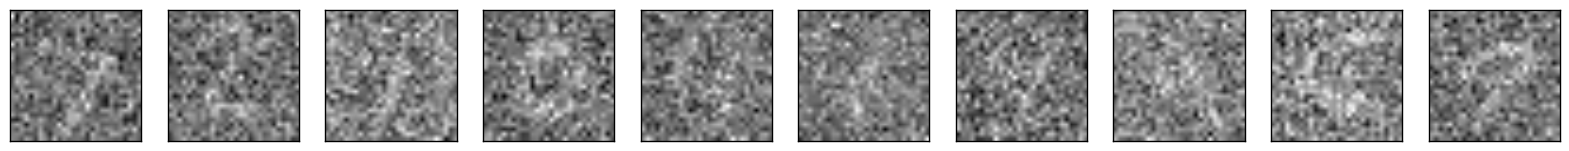

Imagenes Reconstruidas:


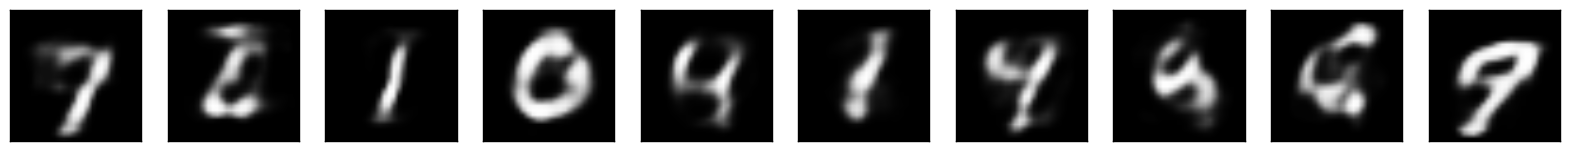

Desviación Estándar:  1.0
Imagenes Corruptas:


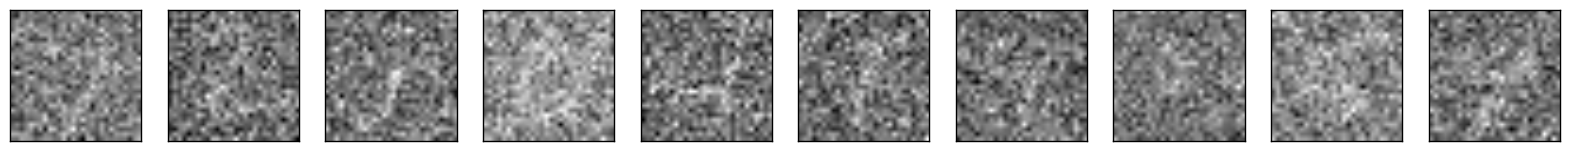

Imagenes Reconstruidas:


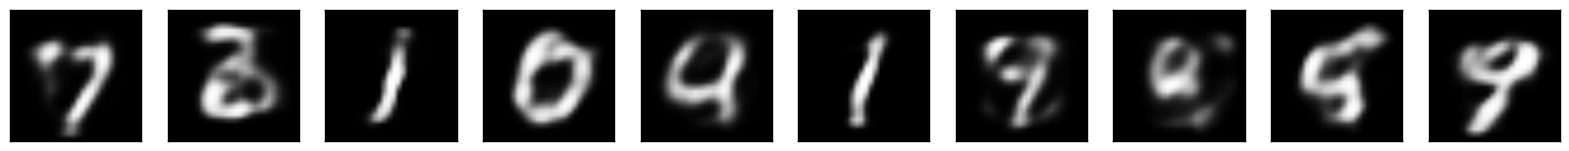

In [9]:
devsts = [0.1,0.3,0.5,0.7,0.9,1.0]

for i in range(len(devsts)):
    devst = devsts[i]

    # Se carga el encoder y decoder obtenido para noise_level 0,1
    encoder = load_model('1_2/encoder_2_'+str(i+1)+'.h5')
    decoder = load_model('1_2/decoder_2_'+str(i+1)+'.h5')

    print "Desviación Estándar: ", devst

    # Se corrompe la imagen a mostrar

    noise_mask = devst*standard_normal(size=x_train.shape)
    noisy_x_train = x_train+noise_mask
    noise_mask = devst*standard_normal(size=x_val.shape)
    noisy_x_val = x_val+noise_mask
    noise_mask = devst*standard_normal(size=x_test.shape)
    noisy_x_test = x_test+noise_mask

    # Visualización postdenoising
    n = 10

    # Se muestra la imagen corrupta
    print "Imagenes Corruptas:"
    plt.figure(figsize=(20, 2))
    for i in range(n):
        ax = plt.subplot(1, n, i+1)
        plt.imshow(noisy_x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

    # Se muestra la imagen reconstruida
    print "Imagenes Reconstruidas:"
    plt.figure(figsize=(20, 2))
    for i in range(n):
        ax = plt.subplot(1, n, i+1)
        encoded = encoder.predict(noisy_x_test[i].reshape(1,784))
        decoded = decoder.predict(encoded)
        plt.imshow(decoded.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

## e)

In [18]:
def visualize_weights(W):
    plt.figure(figsize=(16, 8))

    for ind, val in enumerate(W.T):
        ax = plt.subplot(4, 8, ind+1)
        im = val.reshape((28,28))
        plt.imshow(im, interpolation='nearest')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False) 

    plt.show()

Visualización de pesos Denoising Auto Encoder


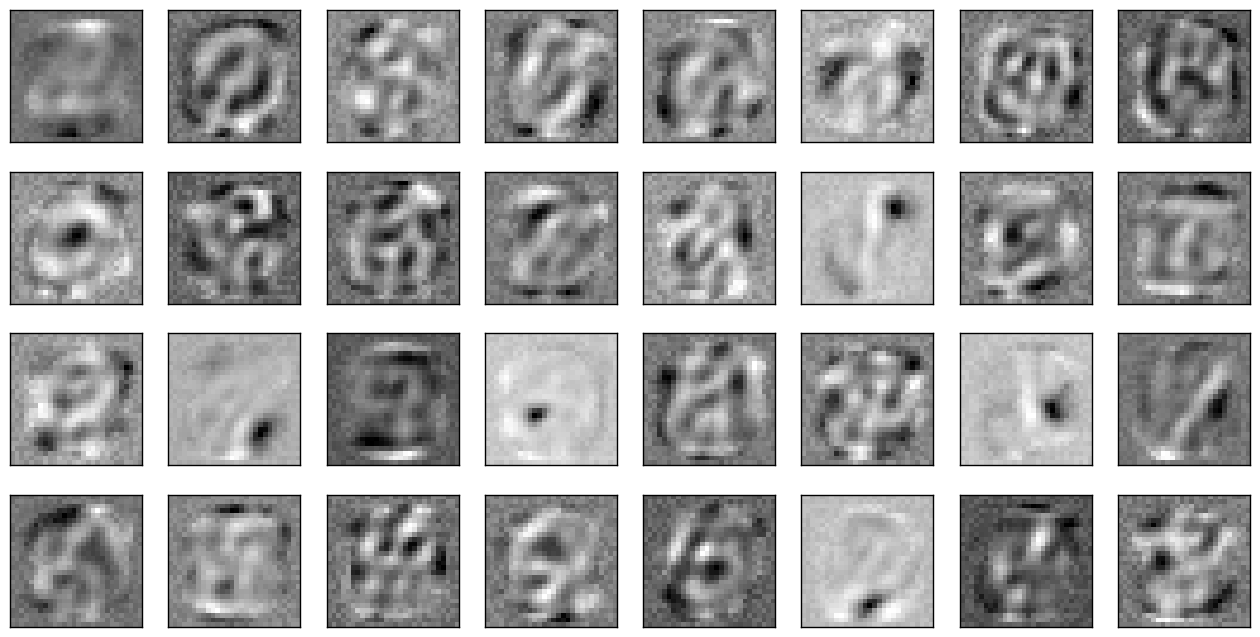

In [22]:
print "Visualización de pesos Denoising Auto Encoder"

model = load_model('1_2/autoencoder3.h5')
W1 = model.get_weights()[0]

visualize_weights(W1)

Visualización de pesos Auto Encoder Básico


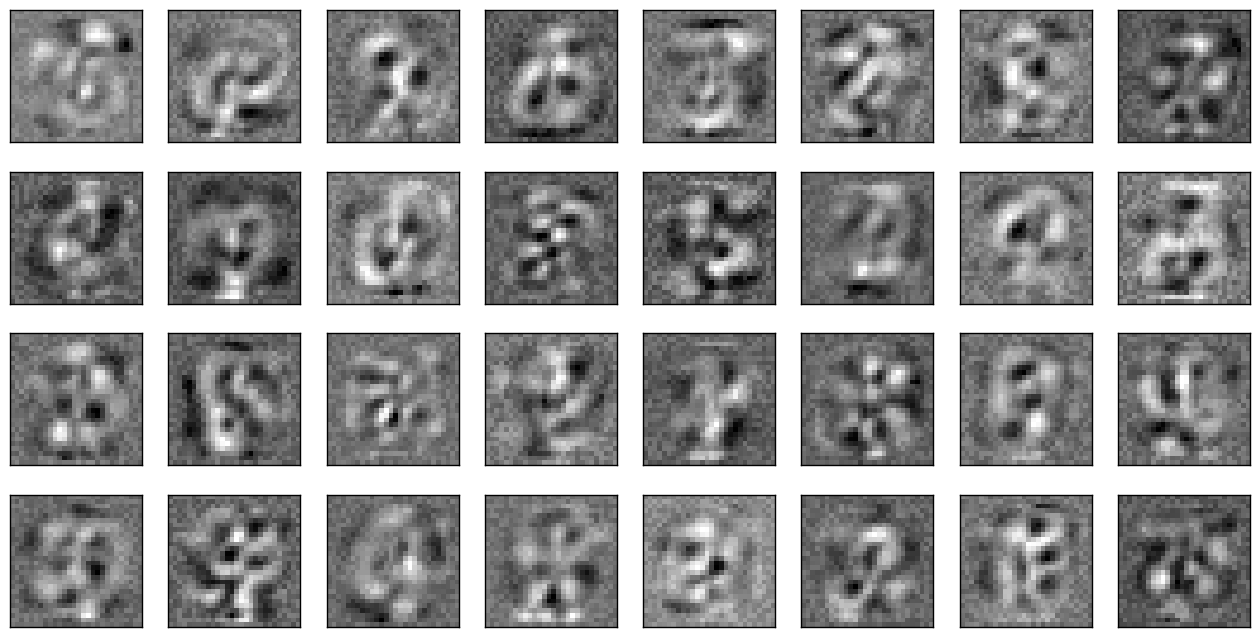

In [20]:
print "Visualización de pesos Auto Encoder Básico"

model = load_model('1_2/basic_autoencoder_relusig_768x32.h5')
W = model.get_weights()[0]

visualize_weights(W)

## f)

In [27]:
ae_basic = load_model('1_2/basic_autoencoder_relusig_768x32.h5')
denoising_ae = load_model('1_2/autoencoder3.h5')

loss_ae = ae_basic.evaluate(x_val, x_val, batch_size=10, verbose=0)
loss_dae = denoising_ae.evaluate(x_val, x_val, batch_size=10, verbose=0)

print "Pérdida Autoencoder Normal con datos normales: ", loss_ae

print "Pérdida Denoising Autoencoder con datos normales: ", loss_dae

loss_ae = ae_basic.evaluate(x_val, x_val, batch_size=10, verbose=0)
loss_dae = denoising_ae.evaluate(x_val, x_val, batch_size=10, verbose=0)

print "Pérdida Autoencoder Normal con datos normales: ", loss_ae

print "Pérdida Denoising Autoencoder con datos normales: ", loss_dae

Pérdida Autoencoder Normal:  0.0940659301728
Pérdida Denoising Autoencoder:  0.287425978184
